## 분산투자



In [1]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 데이터 가져오기

samsung = fdr.DataReader("005930", "2017") # 삼성전자
kakao = fdr.DataReader("035720", "2017") # 카카오
sk = fdr.DataReader("000660", "2017") # sk하이닉스
naver = fdr.DataReader("035420", "2017") # 네이버
hyundai = fdr.DataReader("005380", "2017") # 현대차
print(samsung.head())
print(kakao.head())
print(sk.head())
print(naver.head())
print(hyundai.head())

             Open   High    Low  Close  Volume    Change
Date                                                    
2017-01-02  35980  36240  35880  36100   93012  0.001665
2017-01-03  36280  36620  36020  36480  147153  0.010526
2017-01-04  36500  36520  36100  36160  159435 -0.008772
2017-01-05  36060  36060  35540  35560  219349 -0.016593
2017-01-06  36180  36440  36040  36200  177619  0.017998
             Open   High    Low  Close   Volume    Change
Date                                                     
2017-01-02  15534  15574  15373  15394   143140 -0.003947
2017-01-03  15495  16057  15454  16057   445180  0.043069
2017-01-04  16137  17080  16117  16920  1224395  0.053746
2017-01-05  17060  17261  16860  16860   611713 -0.003546
2017-01-06  16940  16960  16498  16800   410880 -0.003559
             Open   High    Low  Close   Volume    Change
Date                                                     
2017-01-02  44750  46000  44600  45800  1547681  0.024609
2017-01-03  46200  47

In [3]:
# 결측치 검사
print(pd.isnull(samsung).sum())
print(pd.isnull(kakao).sum())
print(pd.isnull(sk).sum())
print(pd.isnull(naver).sum())
print(pd.isnull(hyundai).sum())

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64


**삼성전자 단일 종목 투자성과**

In [4]:
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


In [5]:
# 삼성전자 단일 종목 일간 수익률
samsungDayReturn = (samsung['Close'] / samsung['Close'].shift(1)).fillna(1)
samsungDayReturn

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    0.991228
2017-01-05    0.983407
2017-01-06    1.017998
                ...   
2022-06-09    0.998469
2022-06-10    0.978528
2022-06-13    0.973354
2022-06-14    0.996779
2022-06-15    0.974152
Name: Close, Length: 1339, dtype: float64

In [6]:
# 삼전 누적수익률
samsungCumulativeReturn = samsungDayReturn.cumprod()
samsungCumulativeReturn

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    1.001662
2017-01-05    0.985042
2017-01-06    1.002770
                ...   
2022-06-09    1.806094
2022-06-10    1.767313
2022-06-13    1.720222
2022-06-14    1.714681
2022-06-15    1.670360
Name: Close, Length: 1339, dtype: float64

In [7]:
# 누적수익률을 구하는 다른 방법
samsungCumulativeReturn = samsung['Close'] / samsung['Close'].iloc[0]
samsungCumulativeReturn

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    1.001662
2017-01-05    0.985042
2017-01-06    1.002770
                ...   
2022-06-09    1.806094
2022-06-10    1.767313
2022-06-13    1.720222
2022-06-14    1.714681
2022-06-15    1.670360
Name: Close, Length: 1339, dtype: float64

In [8]:
# cagr
samsungCagr = samsungCumulativeReturn.iloc[-1] ** (252/len(samsung))
# mdd
samsungDd = (samsungCumulativeReturn.cummax() - samsungCumulativeReturn) / samsungCumulativeReturn.cummax() * 100
samsungMdd = samsungDd.max()

print("cagr: ",samsungCagr)
print("mdd: ",samsungMdd)

cagr:  1.101369120976451
mdd:  34.55085634393569


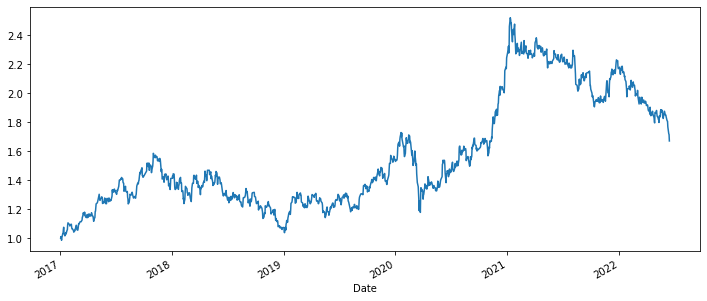

In [9]:
# 시각화
plt.figure(figsize=(12, 5))
samsungCumulativeReturn.plot()
plt.show()

**5개 종목 분산 투자 성과와 누적 수익률 곡선**

5개 종목 종가를 하나의 데이터프레임으로 합치기

In [10]:
stocks = [samsung, kakao, sk, naver, hyundai]
data = pd.DataFrame()

for stock in stocks:
    data = pd.concat([data, stock['Close']], axis=1)
    
data.columns = ["samsung", "kakao", "sk", "naver", "hyundai"]

data

,samsung,kakao,sk,naver,hyundai
2017-01-02,36100,15394,45800,155620,150000
2017-01-03,36480,16057,47250,153617,153000
2017-01-04,36160,16920,46500,162230,154000
2017-01-05,35560,16860,46950,158424,153500
2017-01-06,36200,16800,48000,160026,151000
...,...,...,...,...,...
2022-06-09,65200,81300,105500,273000,182500
2022-06-10,63800,80100,103500,270000,184500
2022-06-13,62100,76500,99000,254000,175000
2022-06-14,61900,76600,99100,253000,171500


#### 다중 종목의 수익률을 계산하는 원리

https://sprinkle-guide-797.notion.site/4f7f60695edc4cebbfe568d442d0627a

## 누적수익률 계산

In [11]:
# 개별 자산 일별 수익률
dayReturn = (data / data.shift(1)).fillna(1)
dayReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,1.031659,0.987129,1.020000
2017-01-04,0.991228,1.053746,0.984127,1.056068,1.006536
2017-01-05,0.983407,0.996454,1.009677,0.976539,0.996753
2017-01-06,1.017998,0.996441,1.022364,1.010112,0.983713
...,...,...,...,...,...
2022-06-09,0.998469,0.997546,0.995283,0.982014,0.997268
2022-06-10,0.978528,0.985240,0.981043,0.989011,1.010959
2022-06-13,0.973354,0.955056,0.956522,0.940741,0.948509
2022-06-14,0.996779,1.001307,1.001010,0.996063,0.980000


In [12]:
# 개별 자산 누적 수익률
cumReturn = data / data.iloc[0]
cumReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,1.031659,0.987129,1.020000
2017-01-04,1.001662,1.099130,1.015284,1.042475,1.026667
2017-01-05,0.985042,1.095232,1.025109,1.018018,1.023333
2017-01-06,1.002770,1.091334,1.048035,1.028313,1.006667
...,...,...,...,...,...
2022-06-09,1.806094,5.281278,2.303493,1.754273,1.216667
2022-06-10,1.767313,5.203326,2.259825,1.734996,1.230000
2022-06-13,1.720222,4.969469,2.161572,1.632181,1.166667
2022-06-14,1.714681,4.975965,2.163755,1.625755,1.143333


In [13]:
# 포트폴리오 비율 : 동일 가중
portWeight = [1/len(data.columns)] * len(data.columns)
portWeight

[0.2, 0.2, 0.2, 0.2, 0.2]

In [14]:
# 누적 수익률
portCumReturn = (portWeight * cumReturn).sum(axis=1)
portCumReturn

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.037043
2017-01-05    1.029347
2017-01-06    1.035424
                ...   
2022-06-09    2.472361
2022-06-10    2.439092
2022-06-13    2.330022
2022-06-14    2.324698
2022-06-15    2.238224
Length: 1339, dtype: float64

## 일간 수익률 계산

### 간단한 방법 -> 역연산

In [15]:
portDayReturn = (portCumReturn / portCumReturn.shift(1)).fillna(1)
portDayReturn

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.018230
2017-01-05    0.992578
2017-01-06    1.005904
                ...   
2022-06-09    0.994998
2022-06-10    0.986544
2022-06-13    0.955283
2022-06-14    0.997715
2022-06-15    0.962802
Length: 1339, dtype: float64

### 안 간단한 방법 -> 비율 계산

In [16]:
# 자산별 비중이 반영된 자산 흐름
weightedCumReturn = portWeight * cumReturn
weightedCumReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,0.200000,0.200000,0.200000,0.200000,0.200000
2017-01-03,0.202105,0.208614,0.206332,0.197426,0.204000
2017-01-04,0.200332,0.219826,0.203057,0.208495,0.205333
2017-01-05,0.197008,0.219046,0.205022,0.203604,0.204667
2017-01-06,0.200554,0.218267,0.209607,0.205663,0.201333
...,...,...,...,...,...
2022-06-09,0.361219,1.056256,0.460699,0.350855,0.243333
2022-06-10,0.353463,1.040665,0.451965,0.346999,0.246000
2022-06-13,0.344044,0.993894,0.432314,0.326436,0.233333
2022-06-14,0.342936,0.995193,0.432751,0.325151,0.228667


In [17]:
weightedCumReturn.sum(axis=1)

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.037043
2017-01-05    1.029347
2017-01-06    1.035424
                ...   
2022-06-09    2.472361
2022-06-10    2.439092
2022-06-13    2.330022
2022-06-14    2.324698
2022-06-15    2.238224
Length: 1339, dtype: float64

In [18]:
# 개별 자산 비율 => 자산 흐름 정규화 
assetRatio = weightedCumReturn.divide(weightedCumReturn.sum(axis=1), axis=0)
assetRatio

,samsung,kakao,sk,naver,hyundai
2017-01-02,0.200000,0.200000,0.200000,0.200000,0.200000
2017-01-03,0.198439,0.204829,0.202589,0.193844,0.200299
2017-01-04,0.193176,0.211974,0.195804,0.201048,0.197999
2017-01-05,0.191392,0.212801,0.199177,0.197799,0.198832
2017-01-06,0.193693,0.210800,0.202436,0.198626,0.194445
...,...,...,...,...,...
2022-06-09,0.146103,0.427225,0.186340,0.141911,0.098421
2022-06-10,0.144916,0.426661,0.185301,0.142266,0.100857
2022-06-13,0.147657,0.426560,0.185541,0.140100,0.100142
2022-06-14,0.147519,0.428096,0.186154,0.139868,0.098364


In [19]:
# 개별 자산 일별 수익률
dayReturn = (data / data.shift(1)).fillna(1)
dayReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,1.031659,0.987129,1.020000
2017-01-04,0.991228,1.053746,0.984127,1.056068,1.006536
2017-01-05,0.983407,0.996454,1.009677,0.976539,0.996753
2017-01-06,1.017998,0.996441,1.022364,1.010112,0.983713
...,...,...,...,...,...
2022-06-09,0.998469,0.997546,0.995283,0.982014,0.997268
2022-06-10,0.978528,0.985240,0.981043,0.989011,1.010959
2022-06-13,0.973354,0.955056,0.956522,0.940741,0.948509
2022-06-14,0.996779,1.001307,1.001010,0.996063,0.980000


In [20]:
# 포트폴리오 개별자산 순 수익률
assetRatio * dayReturn.shift(-1)

,samsung,kakao,sk,naver,hyundai
2017-01-02,0.202105,0.208614,0.206332,0.197426,0.204000
2017-01-03,0.196698,0.215838,0.199373,0.204713,0.201608
2017-01-04,0.189971,0.211222,0.197698,0.196331,0.197356
2017-01-05,0.194836,0.212044,0.203631,0.199799,0.195593
2017-01-06,0.199150,0.208528,0.208973,0.193655,0.193801
...,...,...,...,...,...
2022-06-09,0.142966,0.420920,0.182807,0.140351,0.099500
2022-06-10,0.141054,0.407485,0.177244,0.133835,0.095664
2022-06-13,0.147182,0.427117,0.185728,0.139548,0.098139
2022-06-14,0.143706,0.404064,0.182021,0.133787,0.099224


In [21]:
# 포트폴리오 일간 수익률
portDayReturn2 = (assetRatio * dayReturn.shift(-1)).sum(axis=1).shift(1).fillna(1)
portDayReturn2

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.018230
2017-01-05    0.992578
2017-01-06    1.005904
                ...   
2022-06-09    0.994998
2022-06-10    0.986544
2022-06-13    0.955283
2022-06-14    0.997715
2022-06-15    0.962802
Length: 1339, dtype: float64

In [22]:
portDayReturn

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.018230
2017-01-05    0.992578
2017-01-06    1.005904
                ...   
2022-06-09    0.994998
2022-06-10    0.986544
2022-06-13    0.955283
2022-06-14    0.997715
2022-06-15    0.962802
Length: 1339, dtype: float64

In [23]:
# 포트폴리오 누적 수익률
portCumReturn2 = portDayReturn.cumprod()
portCumReturn2

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.037043
2017-01-05    1.029347
2017-01-06    1.035424
                ...   
2022-06-09    2.472361
2022-06-10    2.439092
2022-06-13    2.330022
2022-06-14    2.324698
2022-06-15    2.238224
Length: 1339, dtype: float64

**분산투자 포트폴리오와 개별 종목 투자 결과 비교**

In [24]:
# 개별 자산 누적수익률
cumReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,1.031659,0.987129,1.020000
2017-01-04,1.001662,1.099130,1.015284,1.042475,1.026667
2017-01-05,0.985042,1.095232,1.025109,1.018018,1.023333
2017-01-06,1.002770,1.091334,1.048035,1.028313,1.006667
...,...,...,...,...,...
2022-06-09,1.806094,5.281278,2.303493,1.754273,1.216667
2022-06-10,1.767313,5.203326,2.259825,1.734996,1.230000
2022-06-13,1.720222,4.969469,2.161572,1.632181,1.166667
2022-06-14,1.714681,4.975965,2.163755,1.625755,1.143333


samsung
cagr: 1.101369120976451
mdd: 34.55085634393569
kakao
cagr: 1.3379207180057169
mdd: 57.345132743362825
sk
cagr: 1.151466481661514
mdd: 39.45435466946485
naver
cagr: 1.0866442097289604
mdd: 46.69603524229075
hyundai
cagr: 1.0272115900553243
mdd: 61.23529411764706
portfolio
cagr: 1.1637290969505618
mdd: 44.8035839425484


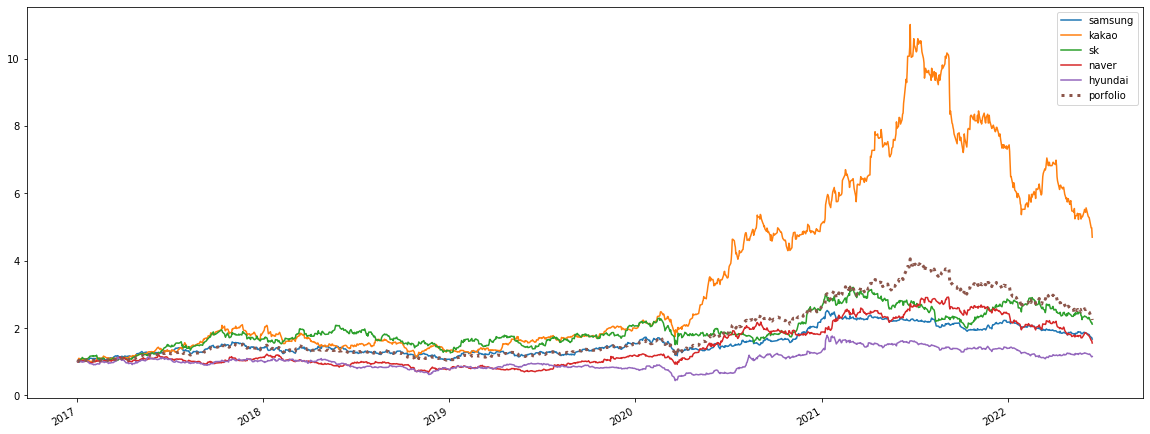

In [25]:
plt.figure(figsize=(20, 8))

for stock in cumReturn.columns:
    # 그래프
    cumReturn[stock].plot(label=stock)
    # cagr
    cagr = cumReturn[stock].iloc[-1] ** (252/len(cumReturn[stock]))
    # mdd
    dd = (cumReturn[stock].cummax() - cumReturn[stock]) / cumReturn[stock].cummax() * 100
    mdd= dd.max()
    
    print(stock)
    print(f"cagr: {cagr}\nmdd: {mdd}")
    print("=======")
    
    

# cagr
cagr = portCumReturn.iloc[-1] ** (252/len(portCumReturn))
# mdd
dd = (portCumReturn.cummax() - portCumReturn) / portCumReturn.cummax() * 100
mdd= dd.max()

print("portfolio")
print(f"cagr: {cagr}\nmdd: {mdd}")
print("=======")

portCumReturn.plot(label = "porfolio", linestyle="dotted", linewidth=3)
plt.legend()
plt.show()

### 다중종목 수익률 계산법 함수화

In [37]:
def getCloseData(ticker, start, end=None):
    """
    종가 데이터
    ticker: 종목 번호
    start: 시작일
    end: 마지막 날짜
    return: 종목의 종가 데이터
    """
    return fdr.DataReader(ticker, start, end)['Close']

samsung=getCloseData("005930", "2015") # 삼성전자
kakao=getCloseData("035720", "2015") # 카카오
data = pd.concat([a,b], axis=1)
data.columns = ['samsung', 'kakao']
data

,samsung,kakao
Date,,
2015-01-02,26600,27538
2015-01-05,26660,29003
2015-01-06,25900,29164
2015-01-07,26140,29746
2015-01-08,26280,29565
...,...,...
2022-06-09,65200,81300
2022-06-10,63800,80100
2022-06-13,62100,76500


In [33]:
def getDayReturn(closeDataSet):
    """
    개별종목 일별 수익률
    closeDataSet: 종가 데이터
    return: 종가 데이터의 일별 수익률
    """
    return (closeDataSet / closeDataSet.shift(1)).fillna(1)

getDayReturn(data)

,samsung,kakao
Date,,
2015-01-02,1.000000,1.000000
2015-01-05,1.002256,1.053199
2015-01-06,0.971493,1.005551
2015-01-07,1.009266,1.019956
2015-01-08,1.005356,0.993915
...,...,...
2022-06-09,0.998469,0.997546
2022-06-10,0.978528,0.985240
2022-06-13,0.973354,0.955056


In [34]:
def getCumulativeReturn(closeDataSet):
    """
    개별종목 누적수익률 == 자산흐름
    closeDataSet: 종가 데이터
    return:종가데이터 누적수익률
    """
    return closeDataSet / closeDataSet.iloc[0]
    
getCumulativeReturn(data)

,samsung,kakao
Date,,
2015-01-02,1.000000,1.000000
2015-01-05,1.002256,1.053199
2015-01-06,0.973684,1.059046
2015-01-07,0.982707,1.080180
2015-01-08,0.987970,1.073607
...,...,...
2022-06-09,2.451128,2.952284
2022-06-10,2.398496,2.908708
2022-06-13,2.334586,2.777980


In [38]:
def getPortfolioResult(closeDataSet, weight=None):
    """
    포트폴리오 결과
    closeDataSet: 종가 데이터
    weight: 포트폴리오 개별자산 비중
    return: 포트폴리오 일간수익률, 누적수익률
    """
    # 개별종목 일별 수익률
    dayReturn = getDayReturn(closeDataSet)
    # 개별종목 누적 수익률
    cumulativeReturn = getCumulativeReturn(closeDataSet)
    # 자산별 비중. 기본값: 동일비중
    if not weight:
        weight = [1/len(closeDataSet.columns)] * len(closeDataSet.columns)
        
    # 포트폴리오 누적 수익률
    portfolioCumulativeReturn = (weight * cumulativeReturn).sum(axis=1)
    # 포트폴리오 일별 수익률
    portfolioDayReturn = (portfolioCumulativeReturn / portfolioCumulativeReturn.shift(1)).fillna(1)
        
    return portfolioDayReturn, portfolioCumulativeReturn

portfolioDayReturn, portfolioCumulativeReturn =getPortfolioResult(data)
print(portfolioDayReturn, portfolioCumulativeReturn)

Date
2015-01-02    1.000000
2015-01-05    1.027727
2015-01-06    0.988944
2015-01-07    1.014836
2015-01-08    0.999365
                ...   
2022-06-09    0.997964
2022-06-10    0.982195
2022-06-13    0.963326
2022-06-14    0.999240
2022-06-15    0.958371
Length: 1833, dtype: float64 Date
2015-01-02    1.000000
2015-01-05    1.027727
2015-01-06    1.016365
2015-01-07    1.031443
2015-01-08    1.030789
                ...   
2022-06-09    2.701706
2022-06-10    2.653602
2022-06-13    2.556283
2022-06-14    2.554339
2022-06-15    2.448006
Length: 1833, dtype: float64


In [39]:
def getEvaluation(cumulativeReturn):
    """
    cagr, dd, mdd
    투자 성과 지표
    """
    # cagr
    cagr = cumulativeReturn.iloc[-1] ** (252/len(cumulativeReturn))
    # dd
    dd = (cumulativeReturn.cummax() - cumulativeReturn) / cumulativeReturn.cummax() * 100
    # mdd
    mdd= dd.max()
    
    print(f"cagr: {cagr}\nmdd: {mdd}")

    return cagr, dd, mdd

portfolioEval = getEvaluation(portfolioCumulativeReturn)

cagr: 1.130976957843867
mdd: 46.587464270203064
